# Examples from/for the photonics paper
The following condensed examples are going to be used in the `gdsfactory` photonics paper.
Please make sure to keep a maximum of approx. 20 lines of code per example.
For optimal rendering the examples should also avoid being too wide. If possible keep lines < 40 characters.

## Fundamentals
You can add polygons to different layers. By default all units in gdsfactory are in um.

In [21]:
import gdsfactory as gf

In [31]:
gf.CONF.plot_height = 300 / 400*350
gf.CONF.plot_width = 350
gf.CONF.plot_oversampling = 5.0

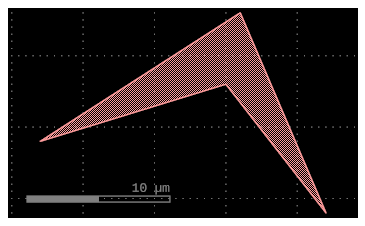

In [61]:
#| label: basics-polygon
import gdsfactory as gf
from gdsfactory.gpdk import PDK
PDK.activate()

# Create a blank component 
# (essentially an empty GDS cell 
# with some special features).
c = gf.Component()

# Add some geometry to it.
p1 = c.add_polygon(
    [(-8, -1), (6, 8), (12, -6), (5, 3)], 
    layer=(1, 0)
)

c # Plot it in jupyter notebook.

In [33]:
gf.CONF.plot_height = 420
gf.CONF.plot_width = 350

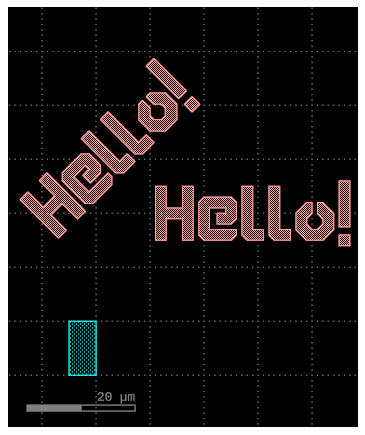

In [34]:
#| label: basics-predefined-components
c = gf.Component()

# Create new geometry from the functions
# available in the geometry library.
t = gf.components.text("Hello!")
r = gf.components.rectangle(
    size=(5, 10), layer=(2, 0)
)

# Add references to the new geometry 
# to c, our blank component.
text1 = c.add_ref(t)

# Using the << operator (identical to add_ref()),
# add the same geometry a second time.
text2 = c << t
r = c << r  # Add the rectangle we created.

# Now that the geometry has been added to "c", 
# we can move everything around:
text1.movey(25)
text2.move((5, 30))
text2.rotate(45)
r.movex(-15)

c

In [35]:
gf.CONF.plot_height = 330
gf.CONF.plot_width = 350

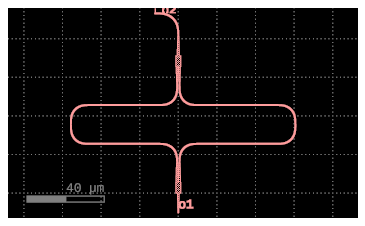

In [53]:
#| label: basics-mzi-pcell
@gf.cell
def mzi_with_bend(
      radius: float = 10.0
    ) -> gf.Component:

    c = gf.Component()
    mzi = c << gf.components.mzi(length_y=35)
    mzi.rotate(90)
    bend = c << (
        gf.components.bend_euler(radius=radius)
    )
    bend.connect("o1", mzi.ports["o2"])

    c.add_port("o2", port=bend.ports["o2"])
    c.add_port("o1", port=mzi.ports["o1"])

    return c

c_mzi_with_bend = mzi_with_bend(radius=12)
c_mzi_with_bend.draw_ports()
c_mzi_with_bend

In [ ]:
#| label: basics-pprint-ports
c_mzi_with_bend.pprint_ports()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center                     ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o2   │ 0.5   │ 180.0       │ WG (1/0) │ (-12.0, 93.10000000000001) │ optical   │
│ o1   │ 0.5   │ 270.0       │ WG (1/0) │ (0.0, -10.0)               │ optical   │
└──────┴───────┴─────────────┴──────────┴────────────────────────────┴───────────┘

In [48]:
gf.CONF.plot_height = 210
gf.CONF.plot_width = 350

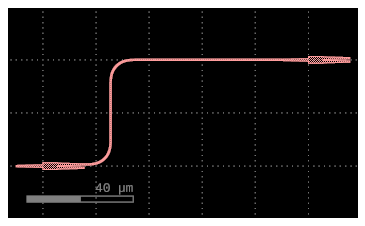

In [49]:
#| label: basics-route-single
c = gf.Component()
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.move((100, 40))

# Automatically route a waveguide 
# between the two MMIs
route = gf.routing.route_single(
    c,
    port1=mmi1.ports["o2"],
    port2=mmi2.ports["o1"],
    cross_section=gf.cross_section.strip,
)
c